In [2]:
# Importing Libraries :
import pandas as pd
import random
import spacy
from spacy.training import Example
from spacy.pipeline.ner import DEFAULT_NER_MODEL
import re
from time import sleep
import re
from spacy import logger
from spacy import displacy

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
# Ignore warnings at the time of training due to entity offsets
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the dataset :
training_file = 'training.txt'
development_file = 'development.txt'
testing_file  = 'test.txt'

with open(training_file, "r") as train_file:
    training_data = train_file.read()

with open(development_file, "r") as dev_file:
    development_data = dev_file.read()

with open(testing_file, "r") as test_file:
    testing_data = test_file.read()

# Adding more samples to the training sets
training_data = training_data + development_data

# Training set : bifuricating the text based on the title and annotations
ctr = 0
train = []
for line in training_data.split("\n\n"):
  train.append(line)
# Test set :
ctr = 0
test = []
for line in testing_data.split("\n\n"):
  test.append(line)

In [5]:
# Extracting the Titles and Makig the annotations :
try:

  def article_extractor(text):
    article = re.findall(r'a\|(.*)\n' , text)
    return article[0]

  def title_extractor(text):
    title = re.findall(r't\|(.*)\n' , text)
    return title[0]

except Exception as e:
  pass

train_article  = []
try:
  for x in train:
    train_article.append(title_extractor(x)+' '+article_extractor(x))
except Exception as e:
  pass

test_article  = []
try:
  for x in test:
    test_article.append(title_extractor(x)+' '+article_extractor(x))
except Exception as e:
  pass

In [6]:
# Selecting the labels from the dataset :

try:
  def get_labels(text):
    l  = re.findall(r'\t(.*)' , text)
    l = [x.split('\t') for x in l]
    labels  = []
    for i in l:
      try:
        labels.append((int(i[0]) , int(i[1]) , i[3]))
      except Exception as e:
        pass
    return labels


  def get_labels_and_entity(text):
    l = re.findall(r'\t(.*)' , text)
    l = [x.split('\t') for x in l]
    labels  = []
    for i in l:
      try:
        labels.append((int(i[0]) , int(i[1]) , i[3], i[2]))
      except Exception as e:
        pass
    return labels
except Exception as e:
  pass

train_labels  = [get_labels(x) for x in train]
test_labels = [get_labels(x) for x in test]

train_labels = [{"entities": entry} for entry in train_labels]
test_labels = [{"entities": entry} for entry in test_labels]

# The entities text is added in the dataset as training spacy model needs to have a specifi format :

In [7]:
# Making the data frame :

train_df  = pd.DataFrame(train_article, columns=['article'])
test_df  = pd.DataFrame(test_article, columns=['article'])

min_length = min(len(test_df), len(test_labels), len(train_df), len(train_labels))

test_df = test_df.iloc[:min_length].copy()
train_df = train_df.iloc[:min_length].copy()

test_df['labels'] = test_labels[:min_length]
train_df['labels'] = train_labels[:min_length]


In [8]:
train_data  = []
test_data = []

for _, row in train_df.iterrows():
    text = row['article']
    entities = row['labels']['entities']
    train_data.append((text, {"entities": entities}))

# print(train_data[0])

for _, row in test_df.iterrows():
    text = row['article']
    entities = row['labels']['entities']

    test_data.append((text, {"entities": entities}))


In [9]:
test_data[0]

('Famotidine-associated delirium. A series of six cases. Famotidine is a histamine H2-receptor antagonist used in inpatient settings for prevention of stress ulcers and is showing increasing popularity because of its low cost. Although all of the currently available H2-receptor antagonists have shown the propensity to cause delirium, only two previously reported cases have been associated with famotidine. The authors report on six cases of famotidine-associated delirium in hospitalized patients who cleared completely upon removal of famotidine. The pharmacokinetics of famotidine are reviewed, with no change in its metabolism in the elderly population seen. The implications of using famotidine in elderly persons are discussed.',
 {'entities': [(0, 10, 'Chemical'),
   (22, 30, 'Disease'),
   (55, 65, 'Chemical'),
   (156, 162, 'Disease'),
   (324, 332, 'Disease'),
   (395, 405, 'Chemical'),
   (442, 452, 'Chemical'),
   (464, 472, 'Disease'),
   (537, 547, 'Chemical'),
   (573, 583, 'Che

In [10]:
train_data[0]

('Naloxone reverses the antihypertensive effect of clonidine. In unanesthetized, spontaneously hypertensive rats the decrease in blood pressure and heart rate produced by intravenous clonidine, 5 to 20 micrograms/kg, was inhibited or reversed by nalozone, 0.2 to 2 mg/kg. The hypotensive effect of 100 mg/kg alpha-methyldopa was also partially reversed by naloxone. Naloxone alone did not affect either blood pressure or heart rate. In brain membranes from spontaneously hypertensive rats clonidine, 10(-8) to 10(-5) M, did not influence stereoselective binding of [3H]-naloxone (8 nM), and naloxone, 10(-8) to 10(-4) M, did not influence clonidine-suppressible binding of [3H]-dihydroergocryptine (1 nM). These findings indicate that in spontaneously hypertensive rats the effects of central alpha-adrenoceptor stimulation involve activation of opiate receptors. As naloxone and clonidine do not appear to interact with the same receptor site, the observed functional antagonism suggests the release

In [11]:
!python -m spacy download en_core_web_lg


     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     --------------------------------------- 2.4/400.7 MB 12.3 MB/s eta 0:00:33
      -------------------------------------- 6.3/400.7 MB 16.1 MB/s eta 0:00:25
      ------------------------------------- 10.0/400.7 MB 16.4 MB/s eta 0:00:24
     - ------------------------------------ 13.6/400.7 MB 16.8 MB/s eta 0:00:24
     - ------------------------------------ 17.0/400.7 MB 16.5 MB/s eta 0:00:24
     - ------------------------------------ 20.4/400.7 MB 16.6 MB/s eta 0:00:23
     -- ----------------------------------- 23.9/400.7 MB 16.4 MB/s eta 0:00:23
     -- ----------------------------------- 27.3/400.7 MB 16.5 MB/s eta 0:00:23
     -- ----------------------------------- 30.7/400.7 MB 16.5 MB/s eta 0:00:23
     --- ---------------------------------- 32.8/400.7 MB 15.6 MB/s eta 0:00:24
     --- ---------------------------------- 36.2/400.7 MB 15.6 MB/s eta 0:00:24
     --- ---------------------------------- 40.

In [12]:
### Both the train and test dataset are done and now we can train the model :
nlp = spacy.load("en_core_web_lg")
ner = nlp.get_pipe("ner")


def train_ner(nlp, train_data, iterations=5):
    optimizer = nlp.resume_training()
    for epoch in range(iterations):
        random.shuffle(train_data)
        losses = {}
        for text, annotations in train_data:
            example = Example.from_dict(nlp.make_doc(text), annotations)
            nlp.update([example], drop=0.6, losses=losses)
        print(f"Epoch {epoch+1}, Loss: {losses}")

In [13]:
# Call the train ner function : for training the model :
train_ner(nlp, train_data)

Epoch 1, Loss: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(14574.432)}
Epoch 2, Loss: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(9149.555)}
Epoch 3, Loss: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(6982.134)}
Epoch 4, Loss: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(5818.5674)}
Epoch 5, Loss: {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': np.float32(5108.1333)}


In [14]:
# Make function for the uncertain predictions and feed some unlabeled data in the model :

def get_uncertain_predictions(nlp, texts, threshold=0.5):
    uncertain_samples = []
    for text in texts:
        doc = nlp(text)
        for ent in doc.ents:
            # Simulate uncertainty based on entity length (longer names -> more confidence)
            confidence = len(ent.text) / len(text)
            if confidence < threshold:
                uncertain_samples.append((text, ent.text, ent.label_, confidence))
    return uncertain_samples

UNLABELED_DATA = [
    "Ibuprofen is a pain reliever.",
    "Clonidine is used for blood pressure control.",
    "Patients with diabetes should monitor sugar levels.",
]

uncertain_samples = get_uncertain_predictions(nlp, UNLABELED_DATA)

In [15]:
test_data[0][0]

'Famotidine-associated delirium. A series of six cases. Famotidine is a histamine H2-receptor antagonist used in inpatient settings for prevention of stress ulcers and is showing increasing popularity because of its low cost. Although all of the currently available H2-receptor antagonists have shown the propensity to cause delirium, only two previously reported cases have been associated with famotidine. The authors report on six cases of famotidine-associated delirium in hospitalized patients who cleared completely upon removal of famotidine. The pharmacokinetics of famotidine are reviewed, with no change in its metabolism in the elderly population seen. The implications of using famotidine in elderly persons are discussed.'

In [16]:
# Model Testing : setting the data using displacy ::
colors  = {
    "Disease" : "#ff698f",
    "Chemical" : "#1472ff"
}

options  = {"ents" : ["Disease" , "Chemical"] , "colors" : colors}

In [17]:
def save_model(nlp, model_path):
    nlp.to_disk(model_path)
    print(f"Model saved to {model_path}")

save_model(nlp=nlp , model_path="NER_MODEL")

Model saved to NER_MODEL


In [20]:
# Check the model for some random text :: from testing data ::
# Lets check the test for the first 10 entries and see the output :

nlp = spacy.load('NER_MODEL')

for i in range(5):
    text = test_data[i][0]
    doc  = nlp(text=text)
    spacy.displacy.render(doc ,style  = "ent" , jupyter = True  , options = options)


In [21]:
model_path =   'NER_MODEL'
check_model  = spacy.load(model_path)

sample_text = input("Enter Medical Based Text  :")

doc = check_model(sample_text)
spacy.displacy.render(doc ,style  = "ent" , jupyter = True , options = options )

In [23]:
import spacy
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Load trained spaCy model
nlp = spacy.load("NER_MODEL")

# Extract true and predicted entities
true_entities = []
pred_entities = []

for i, (test_text, test_label) in enumerate(zip(test, test_labels)):  # Limiting to 10 samples
    doc = nlp(test_text)

    # Extract actual entities
    true_ents = [ent[2] for ent in test_label["entities"]]  # Only entity labels
    pred_ents = [ent.label_ for ent in doc.ents]  # Only entity labels

    true_entities.extend(true_ents)
    pred_entities.extend(pred_ents)

# Ensure both lists are of equal length
min_len = min(len(true_entities), len(pred_entities))
true_labels = true_entities[:min_len]
pred_labels = pred_entities[:min_len]

# Compute accuracy, precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted', zero_division=0)
accuracy = accuracy_score(true_labels, pred_labels)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.50
Precision: 0.50
Recall: 0.50
F1 Score: 0.50


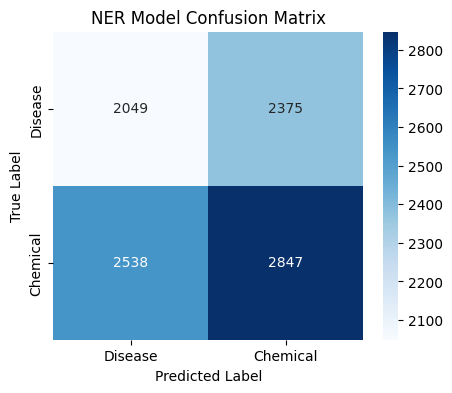

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
labels = list(set(true_labels + pred_labels))  # Get unique entity labels
cm = confusion_matrix(true_labels, pred_labels, labels=labels)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("NER Model Confusion Matrix")
plt.show()


In [ ]:
# Count total entities in ground truth
total_true_entities = sum(len(label["entities"]) for label in test_labels)

# Count total entities predicted by the model
total_pred_entities = sum(len(nlp(text).ents) for text in test)

print(f"Total Entities in Dataset: {total_true_entities}")
print(f"Total Entities Predicted by Model: {total_pred_entities}")
